# Clustering historical stock data for Facebook from 2017 to 2022 using K-Means model (Unsupervised Learning)

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.palettes import Colorblind
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn
sklearn.set_config(display='diagram')
from bokeh.plotting import show,figure,output_notebook
output_notebook()

In [2]:
uploaded = files.upload()

Saving META.csv to META.csv


In [25]:
df = pd.read_csv('META.csv')

# **Data Understanding**

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,171.940002,173.309998,170.270004,173.210007,173.210007,18049500
1,2017-09-08,173.089996,173.490005,170.800003,170.949997,170.949997,10998500
2,2017-09-11,172.399994,173.889999,172.199997,173.509995,173.509995,12372000
3,2017-09-12,173.759995,174.000000,171.750000,172.960007,172.960007,11186300
4,2017-09-13,173.009995,173.169998,172.059998,173.050003,173.050003,9119300


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


## Changing 'Date' column datatype to "datetime" and setting it as DataFrame index

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')

## Dropping 'Adj Close' column

In [4]:
df.drop(columns=['Adj Close'],inplace=True)

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,221.179340,224.112289,218.272170,221.218792,2.245619e+07
std,63.227194,63.883962,62.596820,63.248667,1.445829e+07
min,123.099998,129.740005,123.019997,124.059998,6.046300e+06
25%,175.350002,177.247498,173.067498,175.285003,1.418762e+07
50%,194.720001,197.394996,192.169998,194.595001,1.888235e+07
75%,267.930008,270.452499,263.959999,266.937508,2.601525e+07
max,381.679993,384.329987,378.809998,382.179993,1.881199e+08


# Visualising the data for 2017-2022






<ipython-input-8-d563d5174cd9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(df['Volume'])


[Text(0, 0.0, '18049500'),
 Text(0, 50000000.0, '10998500'),
 Text(0, 100000000.0, '12372000'),
 Text(0, 150000000.0, '11186300'),
 Text(0, 200000000.0, '9119300')]

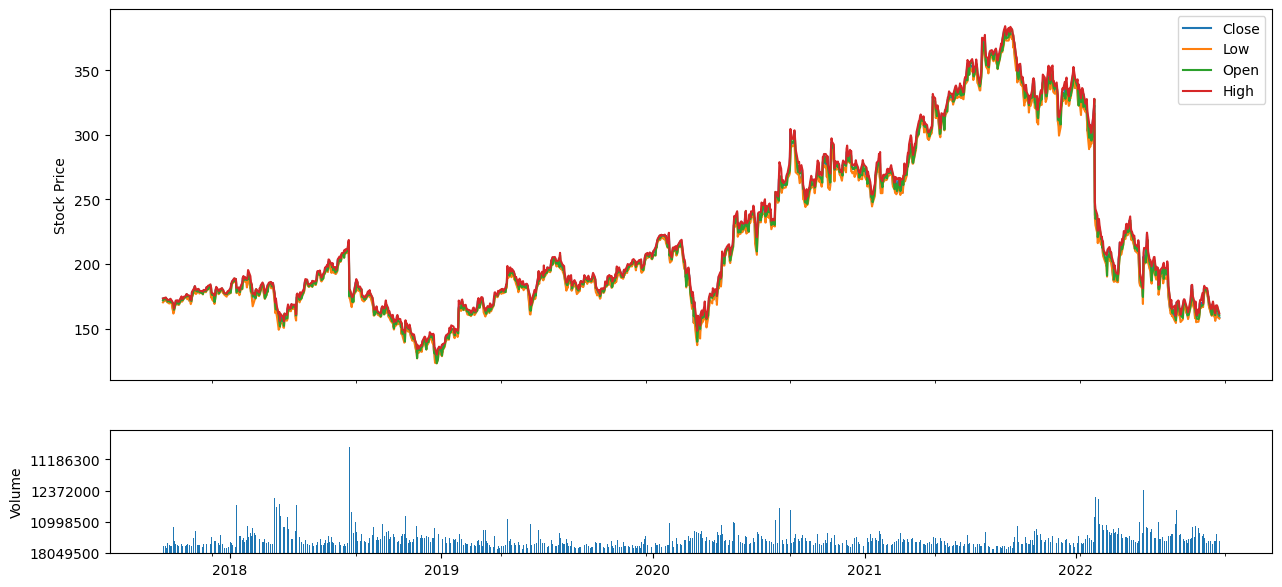

In [8]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8),gridspec_kw={'height_ratios': [3, 1]} ,sharex=True)
df[['Close', 'Low', 'Open', 'High']].plot(ax=ax1)
ax2.bar(df.index,df['Volume'])
ax1.set_ylabel('Stock Price')
ax1.tick_params(axis='x', bottom=False, labelbottom=False)
ax2.set_ylabel('Volume')
ax2.set_yticklabels(df['Volume'])




# Daily Price Growth in Dollar






Text(0, 0.5, 'Close-Open Price')

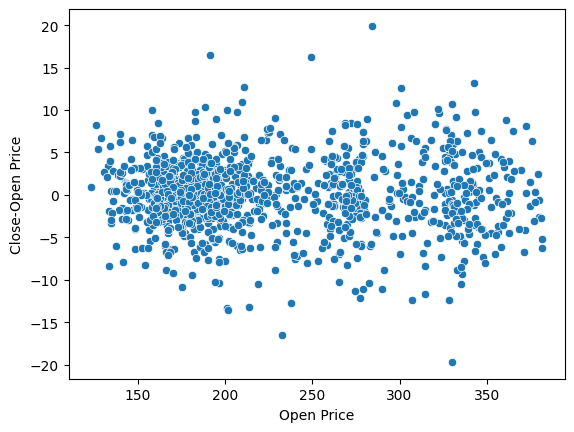

In [10]:
sns.scatterplot(x=df['Open'],y=df['Close']-df['Open'])
plt.xlabel('Open Price')
plt.ylabel('Close-Open Price')

#The relation between open price and volume

<Axes: xlabel='Volume', ylabel='Open'>

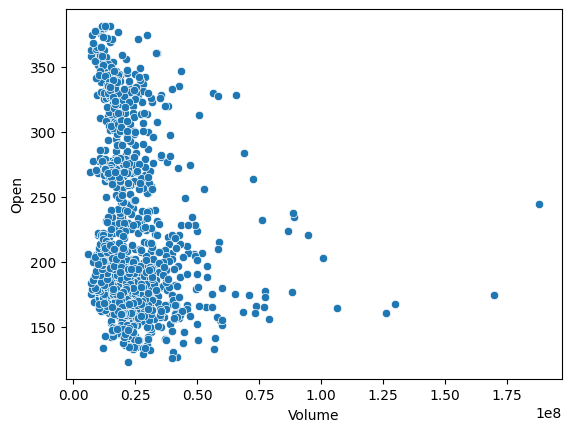

In [57]:
sns.scatterplot(x=df['Volume'],y=df['Open'])

# Clustering data, two approaches:
# 1) Using K-Means Model to segment our data as is.
# 2) Preprocessing data (Rescaling,Reducing Dimensions) before clustering

In [22]:
kmeans=KMeans(random_state=0,n_clusters=3,n_init='auto')
kmeans.fit(df)
kmeans.labels_  # Assigned Clusters

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

Text(0, 0.5, 'Open Price')

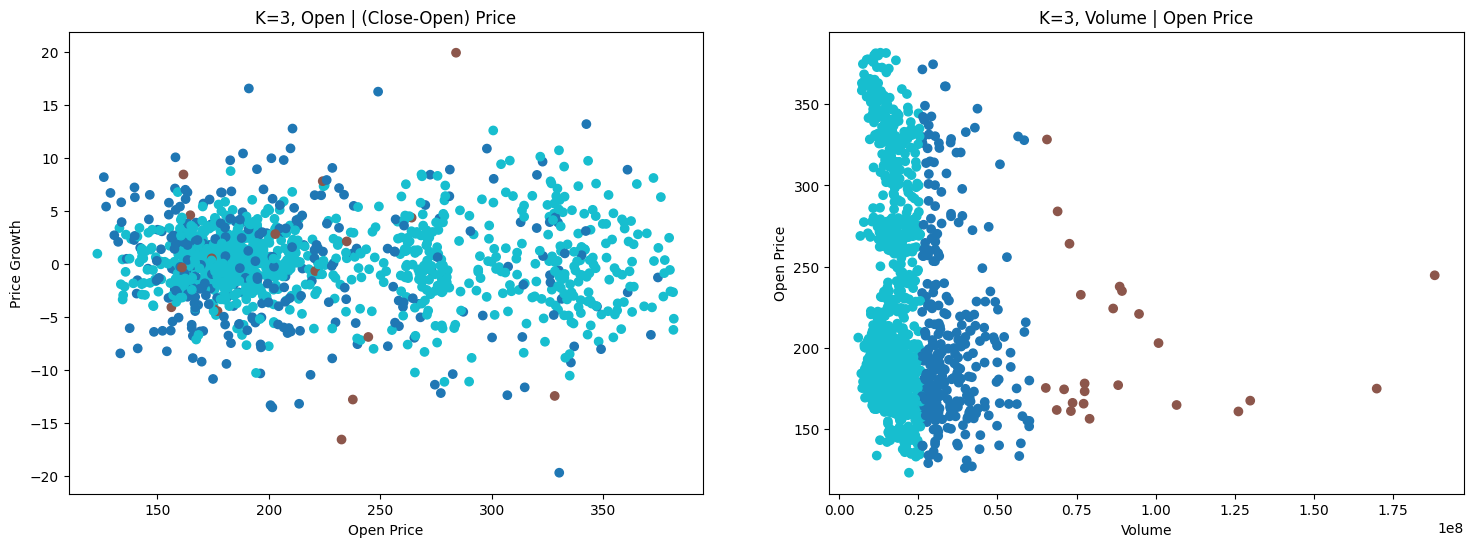

In [28]:
p,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
ax1.scatter(x=df['Open'],y=df['Close']-df['Open'],c=kmeans.labels_,cmap='tab10')
ax2.scatter(x=df['Volume'],y=df['Open'],c=kmeans.labels_,cmap='tab10')
ax1.set_title("K=3, Open | (Close-Open) Price")
ax2.set_title('K=3, Volume | Open Price')
ax1.set_xlabel('Open Price')
ax2.set_xlabel('Volume')
ax1.set_ylabel('Price Growth')
ax2.set_ylabel('Open Price')

In [13]:
kmeans.inertia_ # SSE for K-Means (Sum of Squared Errors)

4.1479827400080536e+16

#**Data Preprocessing and Modeling**
## Make-pipeline from Sci-Kit Learn is used for:
 ### 1) Standardize data using StandardScaler()

 ### 2) Reduce dimensions using PCA() (Principal Component Analysis)( 5 features --> 2 features )
 ### 3) Optimal K (Elbow method)

 ### 4) K-Means Clustering





In [14]:
num_cols=['Open','Close','High','Low','Volume']

scaler=StandardScaler()
pca=PCA(n_components=2)

preprocessor=make_pipeline(scaler,pca)

preprocessor.fit(df[num_cols])
transformed_data = preprocessor.transform(df[num_cols]) # Rescaled and Reduced data

kmeans_p=make_pipeline(KMeans(random_state=0,n_init='auto'))


## PCA uses **weight**s to assign to each column (feature). PCA component ia an array (2, 5), Each element of the array indicates the **weight** of the corresponding original feature in the principal component

In [15]:
pca_components=preprocessor.named_steps['pca'].components_

df_comp=pd.DataFrame(pca_components,columns=num_cols)

print(df_comp)


       Open     Close      High       Low    Volume
0  0.497726  0.497778  0.497533  0.498182 -0.093603
1  0.048105  0.045835  0.060929  0.032317  0.995404


#**weight** of the corresponding original feature in the principal components

<Axes: >

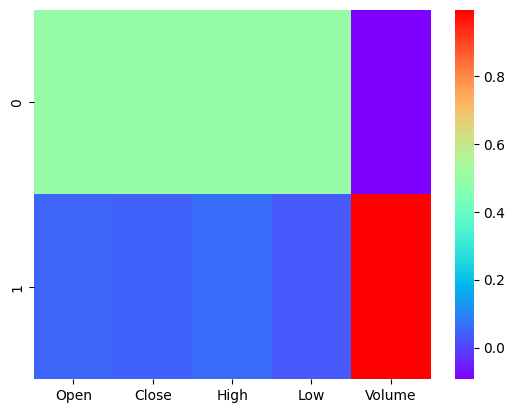

In [19]:
sns.heatmap(df_comp,cmap='rainbow')

#Elbow method: to find the optimal K (No. of Clusters) for K-Means Model.

To Evaluate the performance of the model we can use **inertia**\, the smaller the better.

In [16]:
inertias=[]
k_values=list(range(1,10))
for k in k_values:
  kmeans_p.set_params(kmeans__n_clusters=k)
  kmeans_p.fit(transformed_data)
  inertias.append(kmeans_p.named_steps['kmeans'].inertia_)
p=figure(title='per k inertia',x_axis_label='k',y_axis_label='inertia')
p.line(k_values,inertias)
p.scatter(k_values,inertias)
show(p)

# In the Elbow plot, we clearly see that the best option for K would be 3

In [20]:
optimal_k=3
kmeans_p.set_params(kmeans__n_clusters=optimal_k)
kmeans_p.fit(transformed_data)

Pipeline(steps=[('kmeans',
                 KMeans(n_clusters=3, n_init='auto', random_state=0))])

# Let's plot the result of kmeans model and see the clusters (Based on 2 Principal Components)

In [21]:
df['class']=kmeans_p.named_steps['kmeans'].labels_
classes=df['class'].unique()
classes.sort()
palette = Colorblind[len(classes)]
p=figure(title='Meta Stock K-Means Segments',x_axis_label='First Principal Component',y_axis_label='Second Principal Component')
pca_x1=transformed_data[:,0]  # First Principal Component
pca_x2=transformed_data[:,1]  # Second Principal Component
close=df['Close']
close_dispersion=df['Close']-df['Close'].mean()
for i,cat in enumerate(classes):
  indices=df['class'] == cat
  p.scatter(pca_x1[indices],pca_x2[indices],color=palette[i],legend_label=('segment: '+str(cat)))

show(p)

# Result:
   #  **Segment0**: The average price has the average volume.
   #  **Segment1**: The higer the price the lower the volume.
   #  **Segment2**: The lower the price the higher the volume would be.

